In [18]:
import numpy as np
import pandas as pd
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, make_scorer


In [19]:
writer_r = pd.ExcelWriter(r'F:\...')

In [66]:
data_path = r'F:\..'
sheet_name='Sheet1'
data = pd.read_excel(data_path,skiprows=0,sheet_name=sheet_name)

# data= data.dropna()
print(data.columns)
features=data[data.columns[:3]]
labels=data[data.columns[3]]
print(features, labels)

Index(['Grow date', 'Light period', 'Cumulative light duration',
       'Plant height', 'Stem diameter', 'Cotyledon length', 'Cotyledon width',
       'Total leaf area', 'Leaf number'],
      dtype='object')


In [ ]:
# 定义RMSE
def rmse_scorer(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse = make_scorer(rmse_scorer, greater_is_better=False)


# RF
# param_grid = {
#     'n_estimators':np.arange(1,40,1),
#     'max_depth': np.arange(1,10,1),
# }
# rf = RandomForestRegressor()
# grid_search = GridSearchCV(estimator=gbdt, param_grid=param_grid, cv=5, scoring={'R2': 'r2', 'RMSE': rmse}, refit='R2')
# grid_search.fit(features, labels)

#SVM
# param_grid = {
#     'C': np.arange(0, 15, 0.1),
#     # 'gamma': np.arange(0, 0.010, 0.001)
# }
# SVM = SVR(kernel='rbf')
# scoring = {'R2': 'r2', 'RMSE': rmse}
# grid_search = GridSearchCV(estimator=SVM, param_grid=param_grid, cv=5, scoring=scoring, refit='R2', return_train_score=False)
# grid_search.fit(features, labels)



#GBDT
# param_grid = {
#     'n_estimators': np.arange(0,40,1),
#     'learning_rate': [0.01, 0.1],
#     'max_depth': np.arange(1,10,1),
# }
# gbdt = GradientBoostingRegressor()
# grid_search = GridSearchCV(estimator=gbdt, param_grid=param_grid, cv=5, scoring={'R2': 'r2', 'RMSE': rmse}, refit='R2')
# grid_search.fit(features, labels)


# # DT
# param_grid = {
#     'max_depth': np.arange(1, 10, 1),
#     'min_samples_split': np.arange(2, 10, 1)
# }
# dt = DecisionTreeRegressor()
# grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring={'R2': 'r2', 'RMSE': rmse}, refit='R2')
# grid_search.fit(features, labels)


#Polynomial regression
# param_grid = {
#     'polynomialfeatures__degree': np.arange(1, 5, 1),
# }
# poly_model = make_pipeline(PolynomialFeatures(), LinearRegression())
# grid_search = GridSearchCV(estimator=poly_model, param_grid=param_grid, cv=5, scoring={'R2': 'r2', 'RMSE': rmse}, refit='R2')
# grid_search.fit(features, labels)

# Print the R² value for each parameter combination
mean_test_r2 = grid_search.cv_results_['mean_test_R2']
params = grid_search.cv_results_['params']
mean_test_RMSE=grid_search.cv_results_['mean_test_RMSE']

print("\nR² and rmse scores for all parameter combinations:")
for mean,rmse, param in zip(mean_test_r2, mean_test_RMSE, params):
    print("Parameters: {} => R²: {:.4f} rmse:{:.4f}".format(param, mean,-rmse))
    
#Print the best parameters and results.
best_index = grid_search.best_index_
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation R2 score: {:.4f}".format(mean_test_r2[best_index]))
print("Corresponding RMSE for best R2:", mean_test_RMSE[best_index])


# save the best parameters and results
best_results = {
    'Model': 'DT',
    'Best R2': grid_search.best_score_,
    'Best RMSE': grid_search.cv_results_['mean_test_RMSE'][grid_search.best_index_],
    'Best Parameters': grid_search.best_params_
}

results_df = pd.DataFrame(best_results)
results_df.to_excel(writer_r,sheet_name='height')


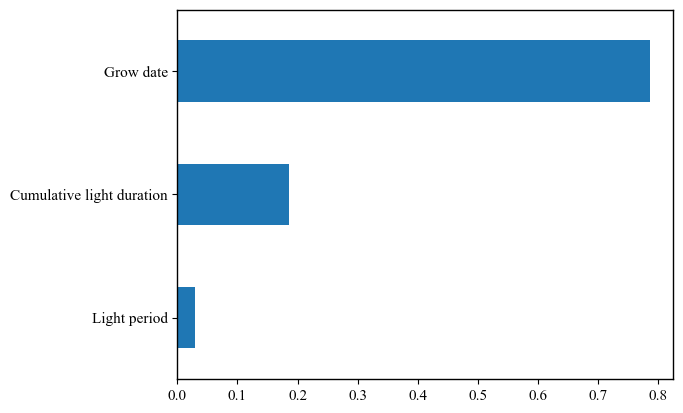

          0                          1
0  0.785832                  Grow date
1  0.185454  Cumulative light duration
2  0.028714               Light period


In [42]:
#构造重要特征变量

best_model = grid_search.best_estimator_

# 获取并排序特征重要性
importance = pd.Series(best_model.feature_importances_, index = features.columns)
importance.sort_values().plot(kind='barh')
# importance1= importance.sort_values(ascending=False)
plt.rcParams['font.sans-serif'] = ['SimHei']  
plt.rcParams['axes.unicode_minus'] = False 
plt.show()

sorted_features = sorted(zip(importance,features.columns),reverse=True)
sorted_features=pd.DataFrame(sorted_features)
sorted_features.to_excel(writer_r,index=0,sheet_name='height')
print(sorted_features)

In [ ]:
#save model and data
import os
import pickle

name='height'

path = r'F:\..'
path_model = path + '\\' + name + '.pkl'

try:
    with open(path_model, 'wb') as f:
        pickle.dump(grid_search.best_estimator_, f)  
    print("The model has been successfully saved:", path_model)
except Exception as e:
    print("Error occurred while saving the model:", e)

In [ ]:
#Perform calculations on the dataset.
# Best model prediction on all data
best_model = grid_search.best_estimator_
y_pred_all = best_model.predict(features)

# Calculate R2 and  RMSE on all data
r2_all = r2_score(labels, y_pred_all)
rmse_all = np.sqrt(mean_squared_error(labels, y_pred_all))
print(f"RMSE on all data: {rmse_all:.4f}, R2 on all data: {r2_all:.4f}")

#save
d= {'true':labels, 'predicted':y_pred_all,'R2':r2_all,'RMSE':rmse_all}
results_df = pd.DataFrame(d)
results_df.to_excel(writer_r,sheet_name='height')


In [ ]:
# Plotting
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['axes.linewidth'] = 1
# Bold the axis lines
plt.rcParams['xtick.labelsize'] = 11
plt.rcParams['ytick.labelsize'] = 11
plt.scatter(labels, y_pred_all, color='blue', label='Predicted vs True',s=22)
plt.plot([labels.min(), labels.max()], [labels.min(), labels.max()], 'r--', lw=2, label='Ideal fit')
plt.xlabel('True values(cm)',fontweight='bold',fontsize=14)
plt.ylabel('Predicted values(cm)',fontweight='bold',fontsize=14)
# plt.title('Scatter Plot of True vs Predicted Values (All Data)')
# Add R² and RMSE annotations
plt.text(0.05, 0.8, f'R² = {r2_all:.4f}\nRMSE = {rmse_all:.4f}', 
         transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')

plt.legend()
# path_fig = path + '\\' + sheet_name + '.pdf'
plt.savefig(r'F:\..',format='pdf')
plt.show()


In [ ]:
writer_r.save()

writer_r.close()
